In [16]:
###TSS_cluster_input

import pandas as pd

tss=pd.read_csv('./Data/TSS_cluster_coordinates.txt',sep='\t')
tss_sort1=tss.dropna(axis=0,subset = ["Assigned_gene_name"])
tss_sort2=tss_sort1.dropna(axis=0,subset = ["start"])
tss_sort=tss_sort2.dropna(axis=0,subset = ["end"])
tss_sort_pos=tss_sort[tss_sort['Strand.dcp2']=='+']
tss_sort_neg=tss_sort[tss_sort['Strand.dcp2']=='-']
print(tss_sort_pos)

      TC_ID  Chr.wt     start       end Strand.dcp2 Assigned_gene_name  \
1         2    chrI    9327.0    9373.0           +            YAL066W   
2         3    chrI   11318.0   11343.0           +          YAL064W-B   
12       13    chrI   31108.0   31119.0           +            YAL062W   
13       14    chrI   31188.0   31242.0           +            YAL062W   
14       15    chrI   31519.0   31569.0           +            YAL062W   
...     ...     ...       ...       ...         ...                ...   
6954   6972  chrXVI  931061.0  931124.0           +            YPR196W   
6955   6973  chrXVI  931309.0  931428.0           +            YPR196W   
6958   6976  chrXVI  933979.0  934048.0           +            YPR198W   
6966   6984  chrXVI  939847.0  939924.0           +            YPR201W   
6969   6987  chrXVI  942757.0  942827.0           +            YPR202W   

     in_coding_gene  
1               NaN  
2               NaN  
12              NaN  
13              NaN  
1

In [17]:
###TSS_cluster_input

import pandas as pd

tss=pd.read_csv('./Data/TSS_cluster_coordinates.txt',sep='\t')
tss_sort1=tss.dropna(axis=0,subset = ["Assigned_gene_name"])
tss_sort2=tss_sort1.dropna(axis=0,subset = ["start"])
tss_sort=tss_sort2.dropna(axis=0,subset = ["end"])
tss[tss[['start','end']].isnull().T.any()][['start','end']]


,start,end
13665,NaN,NaN
13666,NaN,NaN
13667,NaN,NaN
13668,NaN,NaN
13669,NaN,NaN
13670,NaN,NaN
13671,NaN,NaN
13672,NaN,NaN
13673,NaN,NaN
13674,NaN,NaN


In [181]:
###+strand chromI


def positive_singlechr_cap(filename,chrom):
    df=pd.read_csv(filename,sep='\t')
    scer=df[(df['strand']=='+')]
    scer_chrom=scer[(scer['chr']==chrom)]
    tss_chrom=tss_sort_pos[(tss_sort_pos['Chr.wt']==chrom)]
    scer_gene=[]
    for i,row in tss_chrom.iterrows():
        start=row['start']
        end=row['end']
        for j,row1 in scer_chrom.iterrows():
            pos=row1['pos']
            if pos>=start and pos<=end:                    
                scer_gene.append(row1)
    scer_cap=pd.DataFrame.from_dict(scer_gene)
    scer_cap.reset_index(inplace=True, drop=True)
                
    return scer_cap


In [13]:
###scer_WT2 +strand chromI TEST(<4000)

def positive_singlechr_cap_test(filename,chrom):
    df=pd.read_csv(filename,sep='\t')
    scer=df[(df['strand']=='+')]
    scer_chrom=scer[(scer['chr']==chrom)&(scer['pos']<=10000)]
    tss_chrom=tss_sort_pos[(tss_sort_pos['Chr.wt']==chrom)&(tss_sort_pos['end']<=10000)]
    scer_gene=[]
    for i,row in tss_chrom.iterrows():
        start=row['start']
        end=row['end']
        for j,row1 in scer_chrom.iterrows():
            pos=row1['pos']
            if pos>=start and pos<=end:                    
                scer_gene.append(row1)
    scer_cap=pd.DataFrame.from_dict(scer_gene)
    scer_cap.reset_index(inplace=True, drop=True)
                
    return scer_cap
print(positive_singlechr_cap_test('./Data/Scer.WT.2.tss','chrI'))

     chr   pos strand genomeTSS  capped  tags
0   chrI  9327      +         A       1    13
1   chrI  9340      +         G       1     1
2   chrI  9356      +         G       1     1
3   chrI  9361      +         A       1     4
4   chrI  9362      +         G       1     1
5   chrI  9368      +         G       1     2
6   chrI  9373      +         G       1     5
7   chrI  9331      +         G       0     1
8   chrI  9338      +         G       0     1
9   chrI  9340      +         G       0     3
10  chrI  9356      +         G       0     1


In [20]:
###Add TC_ID and Asigned gene for single pos chrom
def add_ID(filename,chrom):    
    df=pd.read_csv(filename)
    scer=df[(df['strand']=='+')]
    scer_chrom=scer[(scer['chr']==chrom)]
    tss_chrom=tss_sort_pos[(tss_sort_pos['Chr.wt']==chrom)]
    scer_chrom['ID']=''
    scer_chrom['Assigned_gene']=''
    for i,row in tss_chrom.iterrows():
        ID=row['TC_ID']
        start=row['start']
        gene=row['Assigned_gene_name']
        end=row['end']
        for j,row1 in scer_chrom.iterrows():
            pos=row1['pos']
            if pos>=start and pos<=end:
                scer_chrom.loc[j, 'ID'] = ID
                scer_chrom.loc[j, 'Assigned_gene']=gene
    return scer_chrom



In [10]:
###Add TC_ID and Asigned gene for single neg chrom
def add_ID(filename,chrom):    
    df=pd.read_csv(filename)
    scer=df[(df['strand']=='-')]
    scer_chrom=scer[(scer['chr']==chrom)]
    tss_chrom=tss_sort_neg[(tss_sort_neg['Chr.wt']==chrom)]
    scer_chrom['ID']=''
    scer_chrom['Assigned_gene']=''
    for i,row in tss_chrom.iterrows():
        ID=row['TC_ID']
        start=row['start']
        gene=row['Assigned_gene_name']
        end=row['end']
        for j,row1 in scer_chrom.iterrows():
            pos=row1['pos']
            if pos>=start and pos<=end:
                scer_chrom.loc[j, 'ID'] = ID
                scer_chrom.loc[j, 'Assigned_gene']=gene
    return scer_chrom

In [22]:
###Add TC_ID and Asigned gene for all pos/neg chrom
def positive_addid(filename):
    df=pd.read_csv(filename)
    all=[add_ID(filename,'chrI'),add_ID(filename,'chrII'),add_ID(filename,'chrIII'),
        add_ID(filename,'chrIV'),add_ID(filename,'chrIX'),add_ID(filename,'chrM'),
        add_ID(filename,'chrV'),add_ID(filename,'chrVI'),add_ID(filename,'chrVII'),
        add_ID(filename,'chrVIII'),add_ID(filename,'chrX'),add_ID(filename,'chrXI'),
        add_ID(filename,'chrXII'),add_ID(filename,'chrXIII'),add_ID(filename,'chrXIV'),
        add_ID(filename,'chrXV'),add_ID(filename,'chrXVI')]
    addid=pd.concat(all)
    addid.reset_index(inplace=True, drop=True)
    return addid

wt1_id=positive_addid('./Data/list/combine/dcp2_2.csv')
outputpath='./Data/list/combine/ID/p_dcp2_2_id.csv'
wt1_id.to_csv(outputpath,sep=',',index=False,header=True)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [133]:
### sample1&2 cluster capping rate1
import csv

wt1=pd.read_csv('./Data/list/combine/wt1_id.csv')
wt2=pd.read_csv('./Data/list/combine/wt2_id.csv')
grouped=wt1.groupby(by='ID')
cap=0
uncap=0
l=[]
fo = open("./Data/list/combine/de_test.csv", "w")
writer = csv.writer(fo)
for name,group in grouped:
    for i,row in group.iterrows():
        capped=row['capped']
        tag=row['tags']
        if capped==1:
            cap+=tag
        else:
            uncap+=tag
        capping_rate=cap/(cap+uncap)
    l=[name,capping_rate,0]
    writer.writerow(l)


In [3]:
### sample1&2 cluster capping rate2
import csv
import pandas as pd
wt2=pd.read_csv('./Data/list/combine/wt2_id.csv')
grouped=wt2.groupby(by='ID')
cap=0
uncap=0
l=[]
fo = open("./Data/list/combine/de_test2.csv", "w")
writer = csv.writer(fo)
for name,group in grouped:
    for i,row in group.iterrows():
        capped=row['capped']
        tag=row['tags']
        if capped==1:
            cap+=tag
        else:
            uncap+=tag
        capping_rate=cap/(cap+uncap)
    l=[name,0,capping_rate]
    writer.writerow(l)

In [12]:
###Add heading
import pandas as pd 
import numpy as np 
data=pd.read_csv(r'./Data/list/combine/de_test2.csv',header=None,names=['ID','s1','s2'])
data.to_csv('./Data/sample_comp/wt2.csv',index=False)

In [34]:
###combine two samples
s1=pd.read_csv('./Data/sample_comp/wt1.csv')
s2=pd.read_csv('./Data/sample_comp/wt2.csv')
s1_test=s1.head(100)
s2_test=s2.head(100)
s1_test['s2.a']=''
l=[]

for i,row1 in s1_test.iterrows():
    ID1=row1['ID']
    c1=row1['s1']
    for j,row2 in s2_test.iterrows():
        ID2=row2['ID']
        c2=row2['s2']
    if ID1==ID2:
        print(yes)


            

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
import gzip
import numpy as np
from read_gene_expression import X,GID,STP,SID,UC,CD


ModuleNotFoundError: No module named 'read_gene_expression'

In [ ]:
de = pd.read_csv('./Data/list/combine/de_test.csv', header=None)
de.columns = ['ID','s1','s2']
wt2=pd.read_csv('./Data/list/combine/wt2_id.csv')
grouped=wt2.groupby(by='ID')
cap=0
uncap=0


for i,row in de.iterrows():
    ID=row['ID']
    for name,group in grouped:
        if name==ID: 
            for j,row1 in group.iterrows():
                capped=row1['capped']
                tag=row1['tags']
                if capped==1:
                    cap+=tag
                else:
                    uncap+=tag
                capping_rate=cap/(cap+uncap)
            de.loc[i, 's2'] = capping_rate
de.head()

In [ ]:
wt2=pd.read_csv('./Data/list/combine/wt2_id.csv')
grouped=wt2.groupby(by='ID')
cap=0
uncap=0

fo = open("./Data/list/combine/de_test.csv", "w")
writer = csv.writer(fo)
for name,group in grouped:
    
    for i,row in group.iterrows():
        capped=row['capped']
        tag=row['tags']
        if capped==1:
            cap+=tag
        else:
            uncap+=tag
        capping_rate=cap/(cap+uncap)
    l=[name,capping_rate]
    writer.writerow(l)

In [175]:
###scer_WT2 +strand all

def positive_cap(filename):
    df=pd.read_csv(filename,sep='\t')
    all=[positive_singlechr_cap(filename,'chrI'),positive_singlechr_cap(filename,'chrII'),positive_singlechr_cap(filename,'chrIII'),
        positive_singlechr_cap(filename,'chrIV'),positive_singlechr_cap(filename,'chrIX'),positive_singlechr_cap(filename,'chrM'),
        positive_singlechr_cap(filename,'chrV'),positive_singlechr_cap(filename,'chrVI'),positive_singlechr_cap(filename,'chrVII'),
        positive_singlechr_cap(filename,'chrVIII'),positive_singlechr_cap(filename,'chrX'),positive_singlechr_cap(filename,'chrXI'),
        positive_singlechr_cap(filename,'chrXII'),positive_singlechr_cap(filename,'chrXIII'),positive_singlechr_cap(filename,'chrXIV'),
        positive_singlechr_cap(filename,'chrXV'),positive_singlechr_cap(filename,'chrXVI')]
    cap=pd.concat(all)
    cap.reset_index(inplace=True, drop=True)
    return cap


In [205]:
###scer_WT2 +strand all TEST(<4000)

def positive_cap_test(filename):
    df=pd.read_csv(filename,sep='\t')
    all=[positive_singlechr_cap_test(filename,'chrI'),positive_singlechr_cap_test(filename,'chrII'),positive_singlechr_cap_test(filename,'chrIII'),
        positive_singlechr_cap_test(filename,'chrIV'),positive_singlechr_cap_test(filename,'chrIX'),positive_singlechr_cap_test(filename,'chrM'),
        positive_singlechr_cap_test(filename,'chrV'),positive_singlechr_cap_test(filename,'chrVI'),positive_singlechr_cap_test(filename,'chrVII'),
        positive_singlechr_cap_test(filename,'chrVIII'),positive_singlechr_cap_test(filename,'chrX'),positive_singlechr_cap_test(filename,'chrXI'),
        positive_singlechr_cap_test(filename,'chrXII'),positive_singlechr_cap_test(filename,'chrXIII'),positive_singlechr_cap_test(filename,'chrXIV'),
        positive_singlechr_cap_test(filename,'chrXV'),positive_singlechr_cap_test(filename,'chrXVI')]
    cap=pd.concat(all)
    cap.reset_index(inplace=True, drop=True)
    return cap
dcp2_1=positive_cap_test('./Data/Scer.dcp2.1.tss')
outputpath='./Data/test.csv'
dcp2_1.to_csv(outputpath,sep=',',index=False,header=False)

In [178]:
###scer_WT2 +strand cap counting

def capping_rate(filename):
    df=pd.read_csv(filename,sep='\t')
    cap=0
    uncap=0
    for i,row in positive_cap(filename).iterrows():
        capped=row['capped']
        tag=row['tags']
        if capped==1:
            cap+=tag
        else:
            uncap+=tag
    capping_rate=cap/(cap+uncap)
    return capping_rate


In [186]:
###scer_WT2 +strand cap counting TEST(<4000)

def capping_rate_test(filename):
    df=pd.read_csv(filename,sep='\t')
    cap=0
    uncap=0
    for i,row in positive_cap_test(filename).iterrows():
        capped=row['capped']
        tag=row['tags']
        if capped==1:
            cap+=tag
        else:
            uncap+=tag
    capping_rate=cap/(cap+uncap)
    return capping_rate

capping_rate_test('./Data/Scer.WT.2.tss')

0.8435171385991058

In [ ]:
###+strand Bar plot 
import matplotlib.pyplot as plt
wt2=capping_rate('./Data/Scer.WT.2.tss')
wt1=capping_rate('./Data/Scer.WT.1.tss')
dcp2_1=capping_rate('./Data/Scer.dcp2.1.tss')
dcp2_2=capping_rate('./Data/Scer.dcp2.2.tss')
dcp2=capping_rate('./Data/Scer.dcp2.tss')
dhh1_1=capping_rate('./Data/Scer.dhh1.1.tss')
dhh1_2=capping_rate('./Data/Scer.dhh1.2.tss')
dhh1=capping_rate('./Data/Scer.dhh1.tss')
pat1_1=capping_rate('./Data/Scer.pat1.1.tss')
pat1_2=capping_rate('./Data/Scer.pat1.2.tss')
pat1=capping_rate('./Data/Scer.pat1.tss')
xrn1_1=capping_rate('./Data/Scer.xrn1.1.tss')
xrn1_2=capping_rate('./Data/Scer.xrn1.2.tss')
xrn1=capping_rate('./Data/Scer.xrn1.tss')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mutation = ['wt1', 'wt2','dcp2','dcp2_1','dcp2_2','dhh1','dhh1_1','dhh1_2','pat1','pat1_1','pat1_2','xrn1','xrn1_1','xrn1_2']
rate = [wt1,wt2,dcp2,dcp2_1,dcp2_2,dhh1,dhh1_1,dhh1_2,pat1,pat1_1,pat1_2,xrn1,xrn1_1,xrn1_2]
ax.bar(mutation,rate)
plt.show()

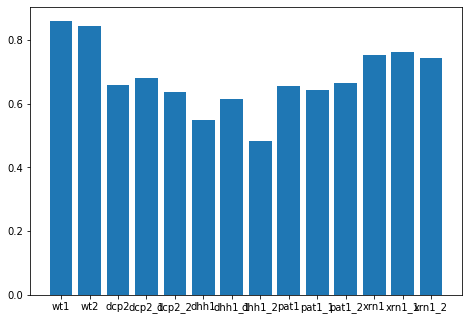

In [187]:
###+strand Bar plot Test(<4000)
import matplotlib.pyplot as plt
wt2=capping_rate_test('./Data/Scer.WT.2.tss')
wt1=capping_rate_test('./Data/Scer.WT.1.tss')
dcp2_1=capping_rate_test('./Data/Scer.dcp2.1.tss')
dcp2_2=capping_rate_test('./Data/Scer.dcp2.2.tss')
dcp2=capping_rate_test('./Data/Scer.dcp2.tss')
dhh1_1=capping_rate_test('./Data/Scer.dhh1.1.tss')
dhh1_2=capping_rate_test('./Data/Scer.dhh1.2.tss')
dhh1=capping_rate_test('./Data/Scer.dhh1.tss')
pat1_1=capping_rate_test('./Data/Scer.pat1.1.tss')
pat1_2=capping_rate_test('./Data/Scer.pat1.2.tss')
pat1=capping_rate_test('./Data/Scer.pat1.tss')
xrn1_1=capping_rate_test('./Data/Scer.xrn1.1.tss')
xrn1_2=capping_rate_test('./Data/Scer.xrn1.2.tss')
xrn1=capping_rate_test('./Data/Scer.xrn1.tss')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mutation = ['wt1', 'wt2','dcp2','dcp2_1','dcp2_2','dhh1','dhh1_1','dhh1_2','pat1','pat1_1','pat1_2','xrn1','xrn1_1','xrn1_2']
rate = [wt1,wt2,dcp2,dcp2_1,dcp2_2,dhh1,dhh1_1,dhh1_2,pat1,pat1_1,pat1_2,xrn1,xrn1_1,xrn1_2]
ax.bar(mutation,rate)
plt.show()

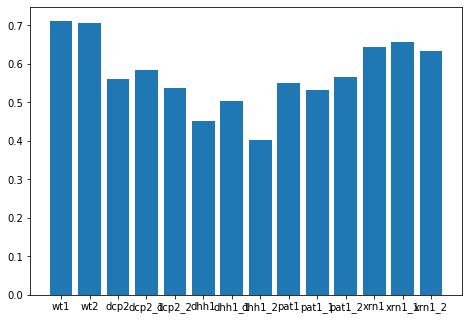

In [177]:
###bar plot_data from linux
import matplotlib.pyplot as plt
wt2=0.7052
wt1=0.7122
dcp2_1=0.5844
dcp2_2=0.5377
dcp2=0.5612
dhh1_1=0.5043
dhh1_2=0.4010
dhh1=0.4509
pat1_1=0.5330
pat1_2=0.5660
pat1=0.5499
xrn1_1=0.6560
xrn1_2=0.6336
xrn1=0.6446

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mutation = ['wt1', 'wt2','dcp2','dcp2_1','dcp2_2','dhh1','dhh1_1','dhh1_2','pat1','pat1_1','pat1_2','xrn1','xrn1_1','xrn1_2']
rate = [wt1,wt2,dcp2,dcp2_1,dcp2_2,dhh1,dhh1_1,dhh1_2,pat1,pat1_1,pat1_2,xrn1,xrn1_1,xrn1_2]
ax.bar(mutation,rate)
plt.show()

In [216]:
pos=pd.read_csv('./Data/list/p_dcp2_2.csv')
pos.columns = ["chr","pos","strand","genomeTSS","capped","tags"]

pos

,chr,pos,strand,genomeTSS,capped,tags
0,chrI,9340,+,G,1,1
1,chrI,9361,+,A,1,1
2,chrI,9368,+,G,1,1
3,chrI,9373,+,G,1,1
4,chrI,9340,+,G,0,4
...,...,...,...,...,...,...
104975,chrXVI,942797,+,A,0,1
104976,chrXVI,942799,+,A,0,1
104977,chrXVI,942803,+,T,0,2
104978,chrXVI,942806,+,T,0,2


In [228]:
###Combine positive and negative strand list

import pandas as pd

def combine_strand(pos,neg):
    pos_list=pd.read_csv(pos)
    neg_list=pd.read_csv(neg)
    pos_list.columns = ["chr","pos","strand","genomeTSS","capped","tags"]
    neg_list.columns = ["chr","pos","strand","genomeTSS","capped","tags"]
    all=[pos_list,neg_list]
    combine=pd.concat(all)
    
    return combine

dhh1_1=combine_strand('./Data/list/p_wt2.csv','./Data/list/n_wt2.csv')
outputpath='./Data/list/combine/wt2.csv'
dhh1_1.to_csv(outputpath,sep=',',index=False,header=True)

In [233]:
def capping_rate(filename):
    df=pd.read_csv(filename)
    cap=0
    uncap=0
    for i,row in df.iterrows():
        capped=row[4]
        tag=row[5]
        if capped==1:
            cap+=tag
        else:
            uncap+=tag
    capping_rate=cap/(cap+uncap)
    return capping_rate



wt2=capping_rate('./Data/list/combine/wt2.csv')
wt1=capping_rate('./Data/list/combine/wt1.csv')
dcp2_1=capping_rate('./Data/list/combine/dcp2_1.csv')
dcp2_2=capping_rate('./Data/list/combine/dcp2_2.csv')

dhh1_1=capping_rate('./Data/list/combine/dhh1_1.csv')
dhh1_2=capping_rate('./Data/list/combine/dhh1_2.csv')

pat1_1=capping_rate('./Data/list/combine/pat1_1.csv')
pat1_2=capping_rate('./Data/list/combine/pat1_2.csv')

xrn1_1=capping_rate('./Data/list/combine/xrn1_1.csv')
xrn1_2=capping_rate('./Data/list/combine/xrn1_2.csv')





0.7011442131316237 0.692726285379428 0.5782392773440743 0.5345362837111031 0.49869348503998795 0.4021637771532536 0.52486480015468 0.5551505868731311 0.6435159397869586 0.6238309127231383


<BarContainer object of 5 artists>

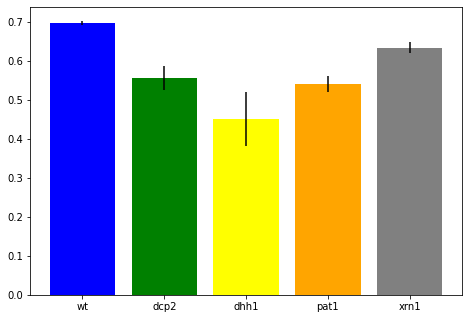

In [278]:
def capping_rate(filename):
    df=pd.read_csv(filename)
    cap=0
    uncap=0
    for i,row in df.iterrows():
        capped=row[4]
        tag=row[5]
        if capped==1:
            cap+=tag
        else:
            uncap+=tag
    capping_rate=cap/(cap+uncap)
    return capping_rate



wt2=capping_rate('./Data/list/combine/wt2.csv')
wt1=capping_rate('./Data/list/combine/wt1.csv')
dcp2_1=capping_rate('./Data/list/combine/dcp2_1.csv')
dcp2_2=capping_rate('./Data/list/combine/dcp2_2.csv')

dhh1_1=capping_rate('./Data/list/combine/dhh1_1.csv')
dhh1_2=capping_rate('./Data/list/combine/dhh1_2.csv')

pat1_1=capping_rate('./Data/list/combine/pat1_1.csv')
pat1_2=capping_rate('./Data/list/combine/pat1_2.csv')

xrn1_1=capping_rate('./Data/list/combine/xrn1_1.csv')
xrn1_2=capping_rate('./Data/list/combine/xrn1_2.csv')

wt=[wt1,wt2]
dcp2=[dcp2_1,dcp2_2]
dhh1=[dhh1_1,dhh1_2]
pat1=[pat1_1,pat1_2]
xrn1=[xrn1_1,xrn1_2]

error_wt=np.std(wt, ddof = 1)
error_dcp2=np.std(dcp2, ddof = 1)
error_dhh1=np.std(dhh1, ddof = 1)
error_pat1=np.std(pat1, ddof = 1)
error_xrn1=np.std(xrn1, ddof = 1)

average_wt=np.average(wt,axis=0)
average_dcp2=np.average(dcp2, axis=0)
average_dhh1=np.average(dhh1, axis=0)
average_pat1=np.average(pat1, axis=0)
average_xrn1=np.average(xrn1, axis=0)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
scer = ['wt','dcp2','dhh1','pat1','xrn1']
rate = [average_wt,average_dcp2,average_dhh1,average_pat1,average_xrn1]
std_err=[error_wt,error_dcp2,error_dhh1,error_pat1,error_xrn1]
ax.bar(scer,rate)
plt.bar(scer,rate,color=['b','g','yellow','orange','gray'],yerr=std_err)

In [288]:
print(rate)

[0.6969352492555259, 0.5563877805275887, 0.4504286310966208, 0.5400076935139055, 0.6336734262550485]


In [253]:
###list sample(<4000)
wt1=pd.read_csv('./Data/list/combine/wt1.csv')

sample=wt1[(wt1['pos']>=6600)&(wt1['pos']<=9000)]
outputpath='./Data/list/combine/test_sample2.csv'
sample.to_csv(outputpath,sep=',',index=False,header=True)

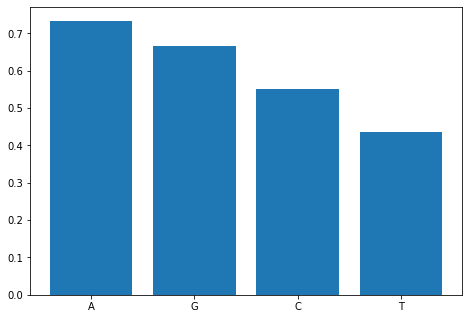

In [248]:
###Genome propotion
import matplotlib.pyplot as plt
import pandas as pd
def genome_capping_rate(filename):
    df=pd.read_csv(filename)
    cap_A=0
    uncap_A=0
    cap_T=0
    uncap_T=0
    cap_G=0
    uncap_G=0
    cap_C=0
    uncap_C=0
    for i,row in df.iterrows():
        genome=row[3]
        capped=row[4]
        tag=row[5]
        if genome=='A':
            if capped==1:
                cap_A+=tag
            else:
                uncap_A+=tag
        elif genome=='T':
            if capped==1:
                cap_T+=tag
            else:
                uncap_T+=tag
        elif genome=='G':
            if capped==1:
                cap_G+=tag
            else:
                uncap_G+=tag
        elif genome=='C':
            if capped==1:
                cap_C+=tag
            else:
                uncap_C+=tag
    capping_rate_A=cap_A/(cap_A+uncap_A)
    capping_rate_T=cap_T/(cap_T+uncap_T)
    capping_rate_G=cap_G/(cap_G+uncap_G)
    capping_rate_C=cap_C/(cap_C+uncap_C)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    genome = ['A','G','C','T']
    rate = [capping_rate_A,capping_rate_G, capping_rate_C, capping_rate_T]
    ax.bar(genome,rate)
    
    
    return plt.show()




In [277]:
###error&average
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def genome_capping_rate(file):
    df=pd.read_csv(file)
    cap_A=0
    uncap_A=0
    cap_T=0
    uncap_T=0
    cap_G=0
    uncap_G=0
    cap_C=0
    uncap_C=0
    for i,row in df.iterrows():
        genome=row[3]
        capped=row[4]
        tag=row[5]
        if genome=='A':
            if capped==1:
                cap_A+=tag
            else:
                uncap_A+=tag
        elif genome=='T':
            if capped==1:
                cap_T+=tag
            else:
                uncap_T+=tag
        elif genome=='G':
            if capped==1:
                cap_G+=tag
            else:
                uncap_G+=tag
        elif genome=='C':
            if capped==1:
                cap_C+=tag
            else:
                uncap_C+=tag
    capping_rate_A=cap_A/(cap_A+uncap_A)
    capping_rate_T=cap_T/(cap_T+uncap_T)
    capping_rate_G=cap_G/(cap_G+uncap_G)
    capping_rate_C=cap_C/(cap_C+uncap_C)
    
    rate = [capping_rate_A,capping_rate_G, capping_rate_C, capping_rate_T]
   
    return rate

def error(file1,file2):

    rate1=genome_capping_rate(file1)
    rate2=genome_capping_rate(file2)
    geno_a=[rate1[0],rate2[0]]
    error_a=np.std(geno_a, ddof = 1)
    geno_g=[rate1[1],rate2[1]]
    error_g=np.std(geno_g, ddof = 1)
    geno_c=[rate1[2],rate2[2]]
    error_c=np.std(geno_c, ddof = 1)
    geno_t=[rate1[3],rate2[3]]
    error_t=np.std(geno_t, ddof = 1)
    error=[error_a,error_g,error_c,error_t]
    return error

def average(file1,file2):
    rate1=genome_capping_rate(file1)
    rate2=genome_capping_rate(file2)
    geno_a=np.average([rate1[0],rate2[0]],axis=0)
    geno_g=np.average([rate1[1],rate2[1]],axis=0)
    geno_c=np.average([rate1[2],rate2[2]],axis=0)
    geno_t=np.average([rate1[3],rate2[3]],axis=0)

    average=[geno_a,geno_g,geno_c,geno_t]
    return average

error_dcp2=error('./Data/list/combine/dcp2_1.csv','./Data/list/combine/dcp2_2.csv')
error_dhh1=error('./Data/list/combine/dhh1_1.csv','./Data/list/combine/dhh1_2.csv')
error_pat1=error('./Data/list/combine/pat1_1.csv','./Data/list/combine/pat1_2.csv')
error_xrn1=error('./Data/list/combine/xrn1_1.csv','./Data/list/combine/xrn1_2.csv')
error_wt=error('./Data/list/combine/wt1.csv','./Data/list/combine/wt2.csv')
average_wt=average('./Data/list/combine/wt1.csv','./Data/list/combine/wt2.csv')
average_dcp2=average('./Data/list/combine/dcp2_1.csv','./Data/list/combine/dcp2_2.csv')
average_dhh1=average('./Data/list/combine/dhh1_1.csv','./Data/list/combine/dhh1_2.csv')
average_pat1=average('./Data/list/combine/pat1_1.csv','./Data/list/combine/pat1_2.csv')
average_xrn1=average('./Data/list/combine/xrn1_1.csv','./Data/list/combine/xrn1_2.csv')

print(average_wt,average_dcp2,average_dhh1,average_pat1,average_xrn1,
     error_wt,error_dcp2,error_dhh1,error_pat1,error_xrn1)



[0.7317252485430364, 0.6592403006179902, 0.5503908202580199, 0.43454035113358824] [0.5975080018797776, 0.5148719795954341, 0.4918441857995517, 0.3591129934195351] [0.4806798381166105, 0.4163998340669074, 0.40986267391589626, 0.29374567724335515] [0.5777053709375835, 0.5015715874493614, 0.47735937668347084, 0.34324508431239303] [0.6735253467664526, 0.5915020270098412, 0.5369601392273547, 0.3856712058371153] [0.0037333857064564082, 0.010899916020410193, 0.0013634896246606577, 0.0005668191546236261] [0.030018266342296245, 0.03034451277165858, 0.018808993496095865, 0.0223917533053771] [0.06966016340195627, 0.0655275998151932, 0.06554232926346384, 0.04689956337768718] [0.017083619212808595, 0.024762195906791542, 0.008556518998448465, 0.0032884063337925056] [0.007483485243868404, 0.021027712362160077, 0.010580869468397817, 0.00797113412459303]


In [287]:
genome_ave = pd.DataFrame([[0.7317252485430364, 0.6592403006179902, 0.5503908202580199, 0.43454035113358824],
[0.5975080018797776, 0.5148719795954341, 0.4918441857995517, 0.3591129934195351],
[0.4806798381166105, 0.4163998340669074, 0.40986267391589626, 0.29374567724335515],
[0.5777053709375835, 0.5015715874493614, 0.47735937668347084, 0.34324508431239303],
[0.6735253467664526, 0.5915020270098412, 0.5369601392273547, 0.3856712058371153],
[0.0037333857064564082, 0.010899916020410193, 0.0013634896246606577, 0.0005668191546236261],
[0.030018266342296245, 0.03034451277165858, 0.018808993496095865, 0.0223917533053771],
[0.06966016340195627, 0.0655275998151932, 0.06554232926346384, 0.04689956337768718],
[0.017083619212808595, 0.024762195906791542, 0.008556518998448465, 0.0032884063337925056], 
[0.007483485243868404, 0.021027712362160077, 0.010580869468397817, 0.00797113412459303]],index=list('wdhpxeeeee'), columns=list('AGCT'))

genome_ave


,A,G,C,T
w,0.731725,0.659240,0.550391,0.434540
d,0.597508,0.514872,0.491844,0.359113
h,0.480680,0.416400,0.409863,0.293746
p,0.577705,0.501572,0.477359,0.343245
x,0.673525,0.591502,0.536960,0.385671
e,0.003733,0.010900,0.001363,0.000567
e,0.030018,0.030345,0.018809,0.022392
e,0.069660,0.065528,0.065542,0.046900
e,0.017084,0.024762,0.008557,0.003288
e,0.007483,0.021028,0.010581,0.007971


<BarContainer object of 4 artists>

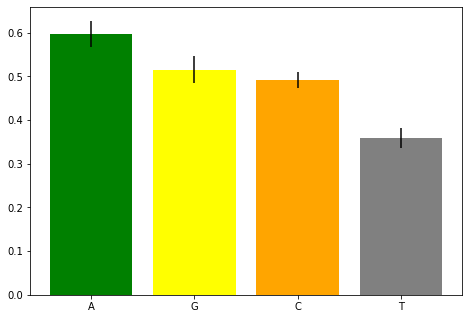

In [272]:
###Bar plot
def plot(file1,file2):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    genome = ['A','G','C','T']
    rate = average(file1,file2)
    std_err=error(file1,file2)
    ax.bar(genome,rate)
    return(plt.bar(genome,rate,color=['g','yellow','orange','gray'],yerr=std_err))

plot('./Data/list/combine/dcp2_1.csv','./Data/list/combine/dcp2_2.csv')

<BarContainer object of 4 artists>

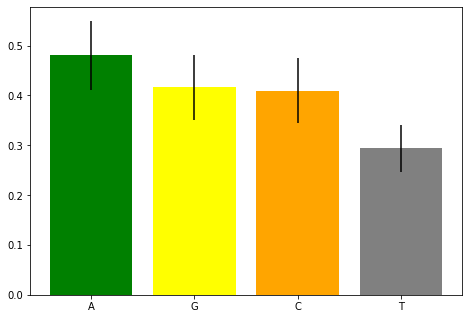

In [273]:
plot('./Data/list/combine/dhh1_1.csv','./Data/list/combine/dhh1_2.csv')

<BarContainer object of 4 artists>

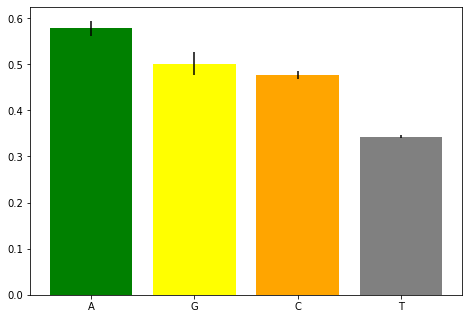

In [274]:
plot('./Data/list/combine/pat1_1.csv','./Data/list/combine/pat1_2.csv')

<BarContainer object of 4 artists>

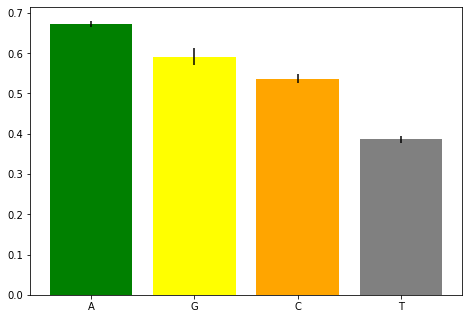

In [275]:
plot('./Data/list/combine/xrn1_1.csv','./Data/list/combine/xrn1_2.csv')

<BarContainer object of 4 artists>

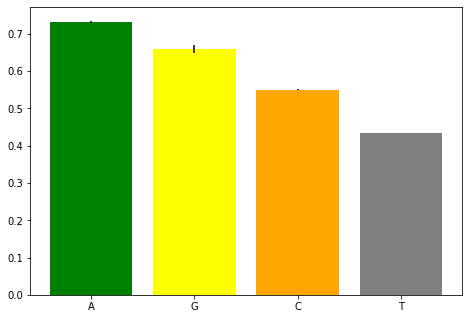

In [276]:
plot('./Data/list/combine/wt1.csv','./Data/list/combine/wt2.csv')

In [1]:
%%bash
git pull
git add Coordinate.ipynb
git commit -a -m "coordinate coding"
git push

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


CalledProcessError: Command 'b'git pull\ngit add Coordinate.ipynb\ngit commit -a -m "coordinate coding"\ngit push\n'' returned non-zero exit status 128.